In [1]:
import os
import random
import matplotlib.pyplot as plt
import tqdm
import drawsvg
import copy
from bbchallenge import *

In [2]:
DB_PATH = "all_5_states_undecided_machines_with_global_header"

In [3]:
header = get_header(DB_PATH)
undecided_time, undecided_space, undecided_total, is_lex_sorted = int.from_bytes(header[:4],byteorder='big'),int.from_bytes(header[4:8],byteorder='big'),\
                                                                  int.from_bytes(header[8:12],byteorder='big'), header[12]
print(undecided_time, undecided_space, undecided_total, is_lex_sorted)

14322029 74342035 88664064 1


In [4]:
SVG_CELL_SIZE = 32

def color_of_state(state):
    # Same as https://bbchallenge.org
    colorList = [
        [255, 0, 0],
        [255, 128, 0],
        [0, 0, 255],
        [0, 255, 0],
        [255, 0, 255],
        [0, 255, 255],
        [255, 255, 0]]
    return "rgb("+",".join(list(map(lambda x: str(x),colorList[state])))+")"

def configuration_to_svg(state, head_pos, tape_content, min_tape_offset, tape_width, i_step, nb_steps):
    g = drawsvg.Group()
    if head_pos not in tape_content:
        tape_content[head_pos] = 0
    for pos in tape_content:
        if pos == head_pos:
            c = color_of_state(state)
        else:
            c = "black" if tape_content[pos] == 0 else "white"
        
        pos_x = SVG_CELL_SIZE*(tape_width//2+pos)
        pos_y = SVG_CELL_SIZE*i_step
        
        g.append(drawsvg.Rectangle(pos_x,
                                pos_y,SVG_CELL_SIZE,SVG_CELL_SIZE,fill=c))
    return g

def tm_trace_to_svg(tm_trace, tape_width=None):
    if len(tm_trace) == 0:
        return
    
    min_tape_offset = min([pos for _,_,tape_content in tm_trace for pos in tape_content])
    max_tape_offset = max([pos for _,_,tape_content in tm_trace for pos in tape_content])
    
    if tape_width is None:
        tape_width = max_tape_offset-min_tape_offset+1
    
    nb_steps = len(tm_trace)
    
    draw_w = SVG_CELL_SIZE*tape_width
    draw_h = SVG_CELL_SIZE*nb_steps
    d = drawsvg.Drawing(draw_w, draw_h, origin=(0,0), displayInline=False)
    c = "black"
    r = drawsvg.Rectangle(0, 0, draw_w, draw_h, fill=c)
    main_group = drawsvg.Group()
    main_group.append(r)
    
    
    i_step = 0
    for state, head_pos, tape_content in tm_trace:
        main_group.append(configuration_to_svg(state, head_pos, tape_content, min_tape_offset, tape_width, i_step, nb_steps))
        i_step += 1
    d.append(main_group)
    return d

def svg_space_time_diagram(machine, nb_steps, tape_width=None, init=()):
    curr_time = 0
    curr_state = 0
    curr_pos = 0
    tape = {0: 0} | dict(init)
    tm_trace = [(curr_state, curr_pos, tape.copy())]
    while curr_state != None and curr_time < nb_steps:
        curr_state, curr_pos = step(machine, curr_state, curr_pos, tape)
        if curr_state is None: break
        tm_trace.append((curr_state,curr_pos,copy.copy(tape)))
        curr_time += 1
    
    return tm_trace_to_svg(tm_trace, tape_width=tape_width)

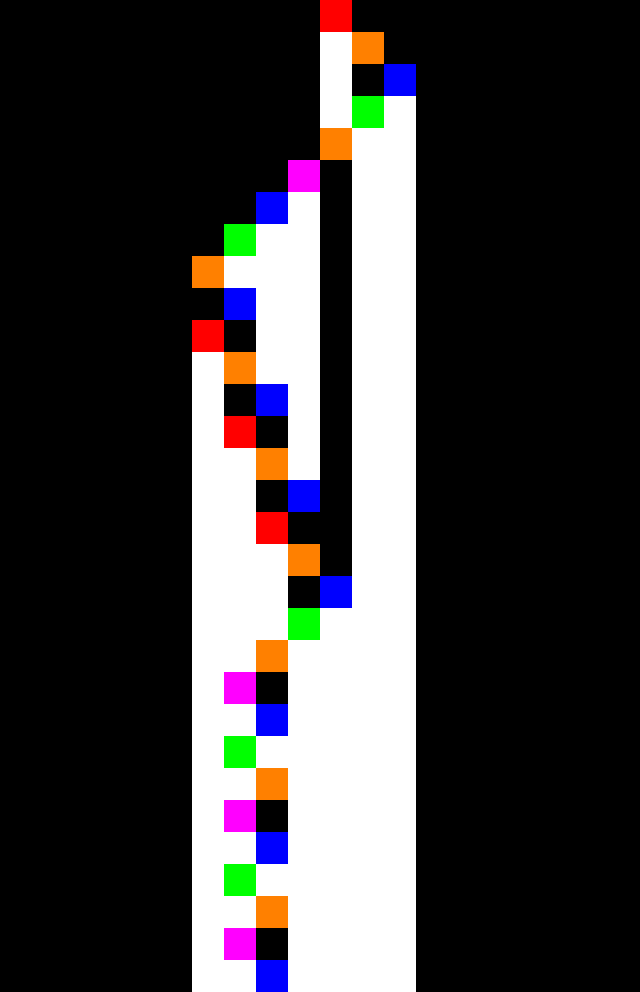

In [5]:
m_id = 279081
m = get_machine_i(DB_PATH,m_id)
svg = svg_space_time_diagram(m,30,tape_width=20)
svg.save_svg(f"output_svg/cycler_{m_id}.svg")
svg

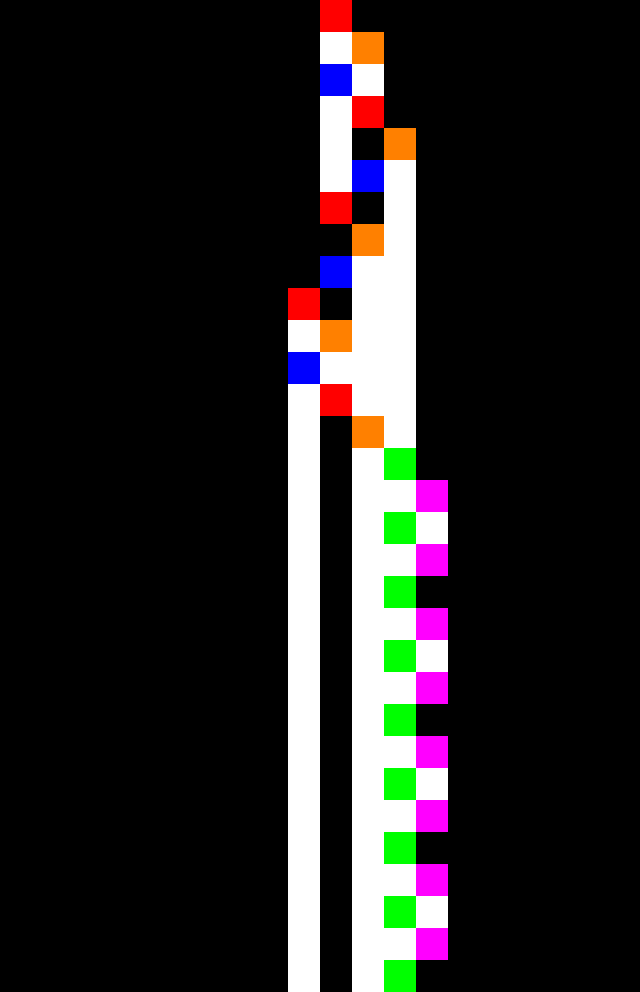

In [6]:
m_id = 4239083
m = get_machine_i(DB_PATH,m_id)
svg = svg_space_time_diagram(m,30,tape_width=20)
svg.save_svg(f"output_svg/cycler_{m_id}.svg")
svg

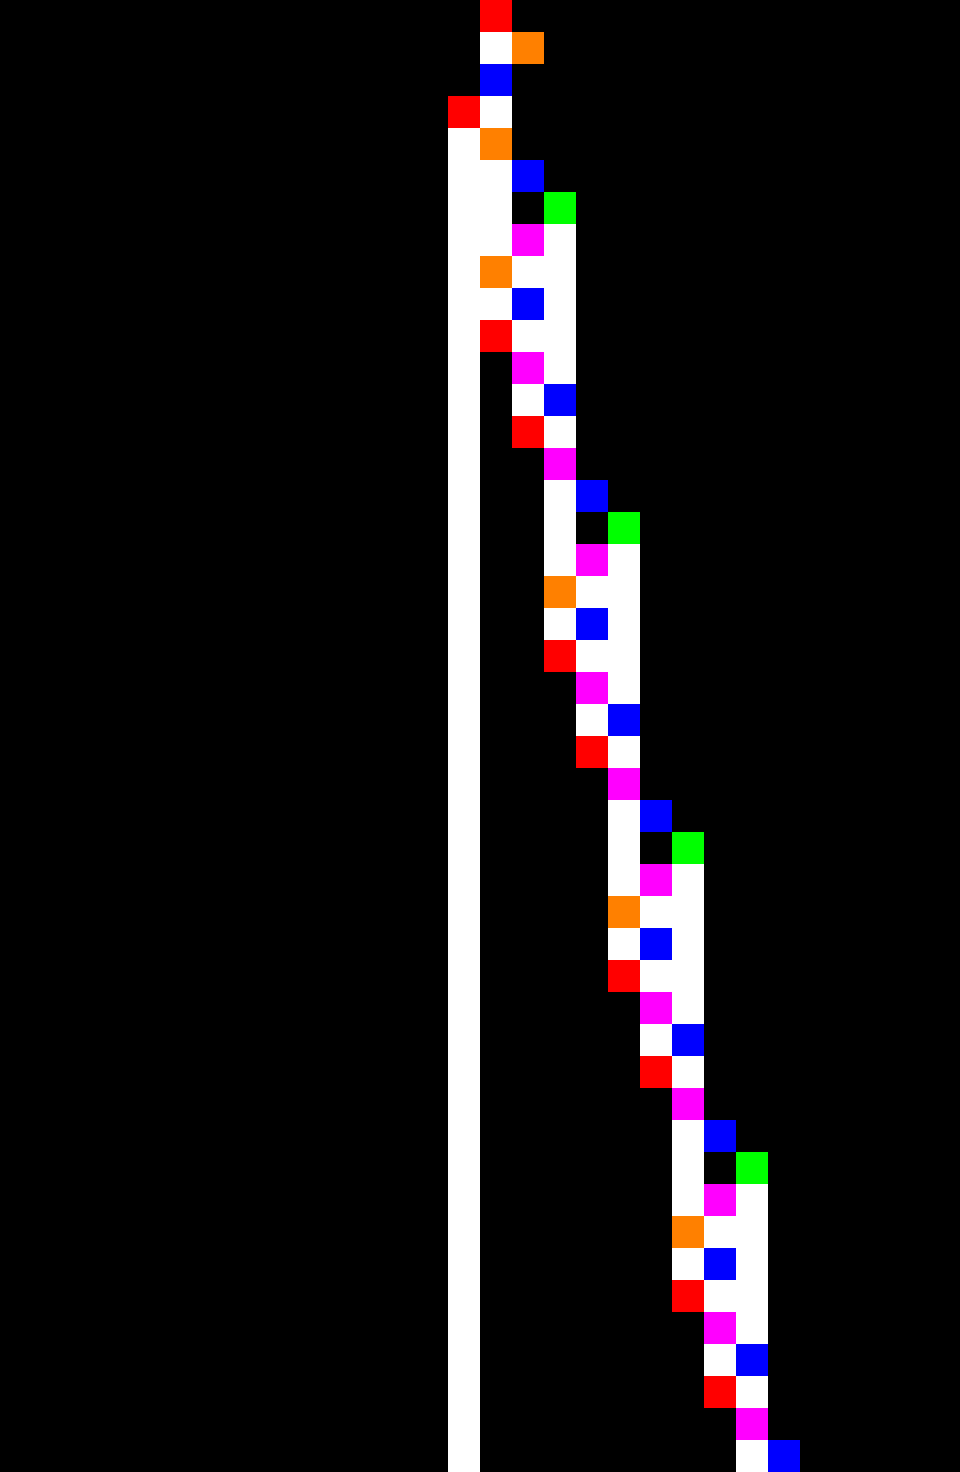

In [7]:
m_id = 44394115
m = get_machine_i(DB_PATH,m_id)
svg = svg_space_time_diagram(m,45,tape_width=30)
svg.save_svg(f"output_svg/translated_cycler_{m_id}.svg")
svg